In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read in CSV
datafile = Path("worldometer_coronavirus_daily_data.csv")
daily_covid_df = pd.read_csv(datafile)

# Convert date column to datetime and create a 'year_month' column
daily_covid_df['date'] = pd.to_datetime(daily_covid_df['date'])
daily_covid_df['year_month'] = daily_covid_df['date'].dt.strftime('%Y-%m')
daily_covid_df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,year_month
0,2020-02-15,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
1,2020-02-16,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
2,2020-02-17,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
3,2020-02-18,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02
4,2020-02-19,Afghanistan,0.0,NaN,0.0,0.0,NaN,2020-02


In [3]:
# Groupby 'date' and 'daily_new_cases' to plot the average new cases over time
avg_new_cases_df = daily_covid_df.groupby('date')['daily_new_cases'].mean().reset_index()
# plt.figure(figsize=(10, 6))
# plt.plot(avg_new_cases_df['date'], avg_new_cases_df['daily_new_cases'], marker='o', linestyle='-')
# plt.title('Average Global COVID by Country')
# plt.ylabel('Daily New Cases')
# plt.xticks(rotation=45)  
# plt.show()

In [4]:
# Groupby 'date' and 'active_cases' to plot the average active cases over time
avg_active_cases_df = daily_covid_df.groupby('date')['active_cases'].mean().reset_index()
# plt.figure(figsize=(10, 6))
# plt.plot(avg_active_cases_df['date'], avg_active_cases_df['active_cases'], marker='o', linestyle='-')
# plt.title('Average Global COVID by Country')
# plt.ylabel('Total Active Cases')
# plt.xticks(rotation=45)  
# plt.show()

In [5]:
# Groupby 'date' and 'daily_new_deaths' to plot the average daily deaths over time
avg_deaths_df = daily_covid_df.groupby('date')['daily_new_deaths'].mean().reset_index()
# plt.figure(figsize=(10, 6))
# plt.plot(avg_deaths_df['date'], avg_deaths_df['daily_new_deaths'], marker='o', linestyle='-')
# plt.title('Average Global COVID by Country')
# plt.ylabel('Daily Deaths')
# plt.xticks(rotation=45)  
# plt.show()

In [6]:
# Merge the average new cases, active cases and deaths dataframes
avg_df = pd.merge(pd.merge(avg_new_cases_df, avg_active_cases_df, on=['date']), avg_deaths_df, on='date')
avg_df.set_index('date', inplace=True)
avg_df.head()


,daily_new_cases,active_cases,daily_new_deaths
date,,,
2020-01-22,NaN,554.0,NaN
2020-01-23,259.0,771.0,8.0
2020-01-24,457.0,1208.0,16.0
2020-01-25,688.0,1870.0,15.0
2020-01-26,769.0,2613.0,24.0


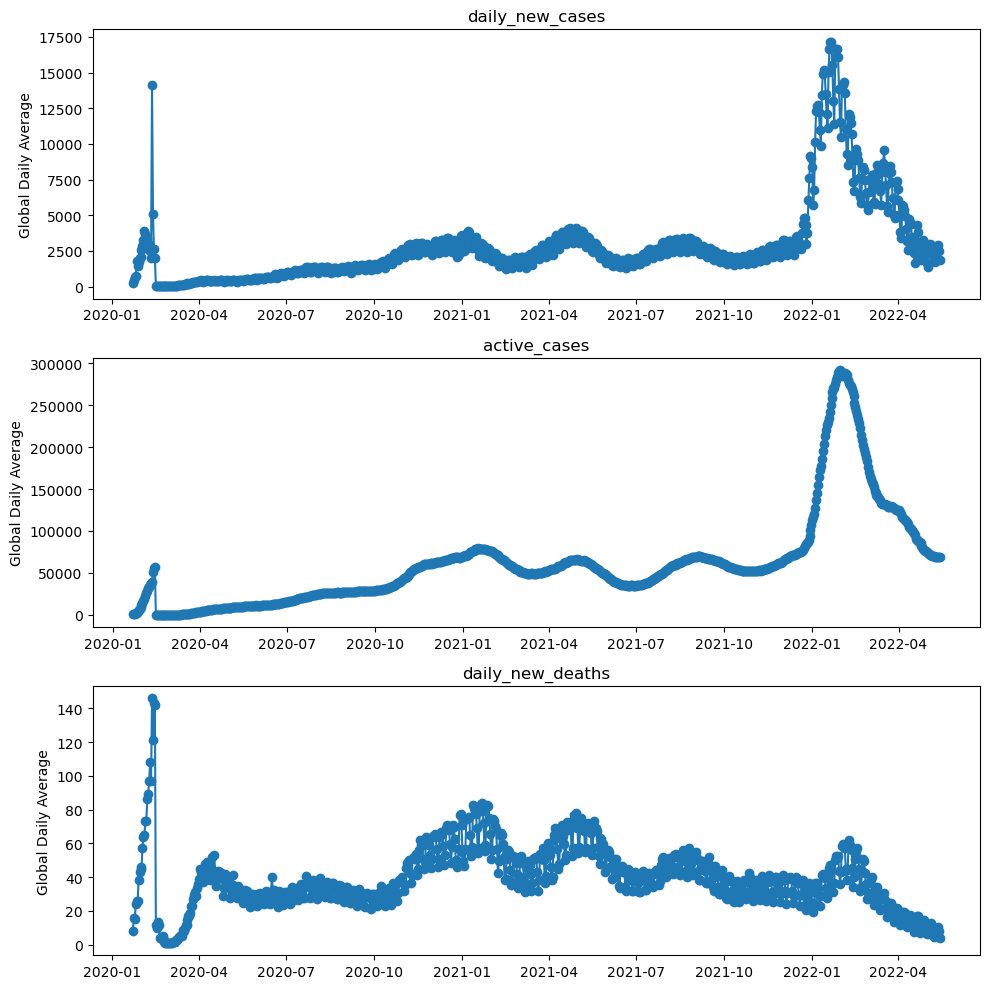

In [7]:
# Plot each column of avg_df on individual graphs
plt.figure(figsize=(10, 10))
for i, column in enumerate(avg_df.columns):
    ax = plt.subplot(len(avg_df.columns), 1, i + 1)
    ax.plot(avg_df.index, avg_df[column], marker='o', linestyle='-', label=column)
    ax.set_title(column)
    ax.set_ylabel('Global Daily Average')

plt.tight_layout()
plt.show()

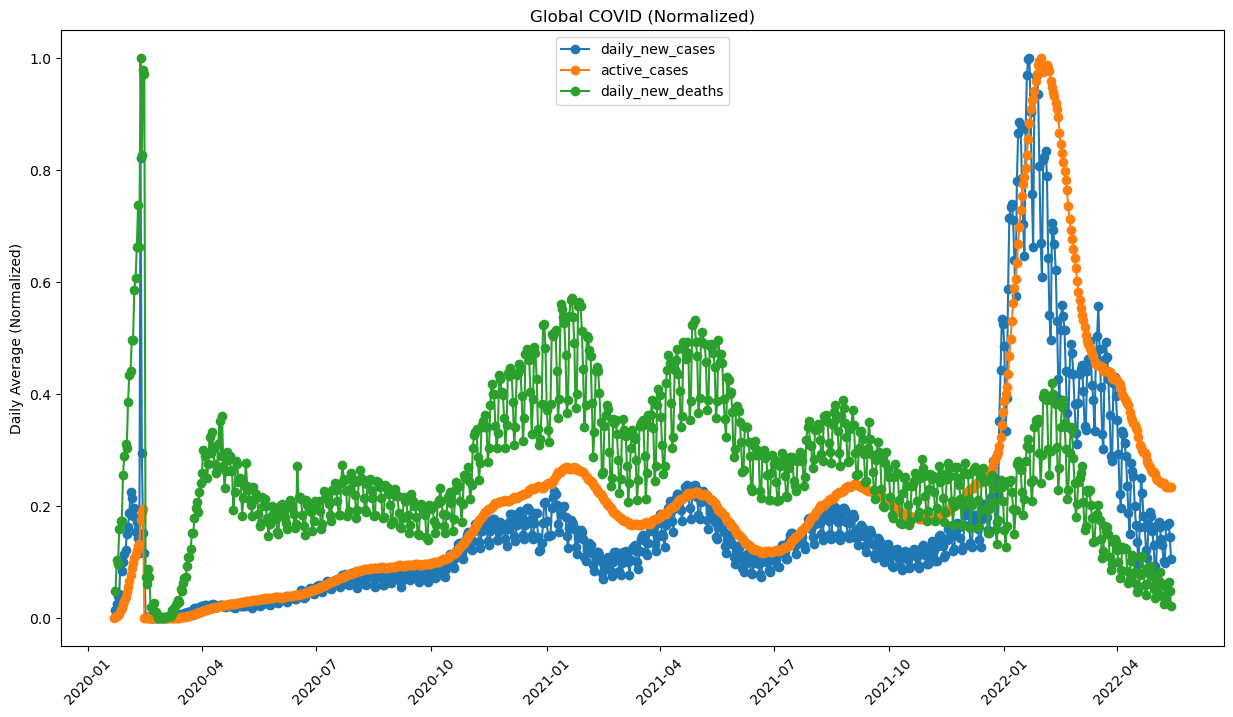

In [8]:
# Normalize the data in each column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(avg_df)
avg_normalized_df = pd.DataFrame(scaled_data, columns=avg_df.columns, index=avg_df.index)

# Plot the normalized data
plt.figure(figsize=(15, 8))
for column in avg_normalized_df.columns:
    plt.plot(avg_normalized_df.index, avg_normalized_df[column], marker='o', linestyle='-', label=column)

plt.title('Global COVID (Normalized)')
plt.ylabel('Daily Average (Normalized)')
plt.legend(loc='upper center')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Create dataframe without null values for correlation matrix
avg_matrix_df = avg_df.dropna(subset=['daily_new_cases', 'active_cases', 'daily_new_deaths'])

# Compute the correlation matrix
correlation_matrix = avg_matrix_df[['daily_new_cases', 'active_cases', 'daily_new_deaths']].corr()

print(correlation_matrix)

                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.911469          0.197524
active_cases             0.911469      1.000000          0.139593
daily_new_deaths         0.197524      0.139593          1.000000


In [10]:
# Groupby to create dataframes for global totals
tot_new_cases_df = daily_covid_df.groupby('date')['daily_new_cases'].sum().reset_index()
tot_active_cases_df = daily_covid_df.groupby('date')['active_cases'].sum().reset_index()
tot_deaths_df = daily_covid_df.groupby('date')['daily_new_deaths'].sum().reset_index()

# Merge the total new cases, active cases and deaths dataframes
tot_df = pd.merge(pd.merge(tot_new_cases_df, tot_active_cases_df, on=['date']), tot_deaths_df, on='date')
tot_df.set_index('date', inplace=True)

In [11]:
# Plot each column of tot_df on individual graphs
# plt.figure(figsize=(10, 10))
# for i, column in enumerate(tot_df.columns):
#     ax = plt.subplot(len(tot_df.columns), 1, i + 1)
#     ax.plot(tot_df.index, tot_df[column], marker='o', linestyle='-', label=column)
#     ax.set_title(column)
#     ax.set_ylabel('Global Daily Total')

# plt.tight_layout()
# plt.show()

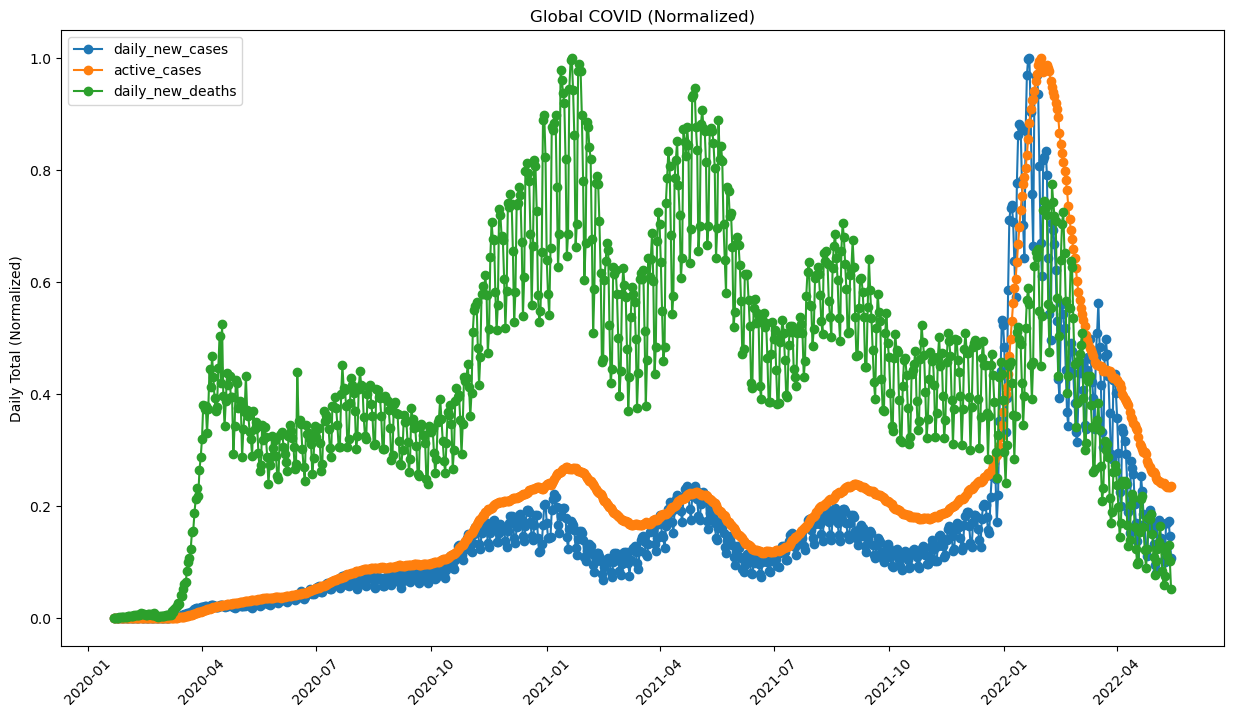

In [12]:
# Normalize the data in each column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tot_df)
tot_normalized_df = pd.DataFrame(scaled_data, columns=tot_df.columns, index=tot_df.index)

# Plot the normalized data
plt.figure(figsize=(15, 8))
for column in tot_normalized_df.columns:
    plt.plot(tot_normalized_df.index, tot_normalized_df[column], marker='o', linestyle='-', label=column)

plt.title('Global COVID (Normalized)')
plt.ylabel('Daily Total (Normalized)')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Create dataframe without null values for correlation matrix
tot_matrix_df = tot_df.dropna(subset=['daily_new_cases', 'active_cases', 'daily_new_deaths'])

# Compute the correlation matrix
correlation_matrix = tot_matrix_df[['daily_new_cases', 'active_cases', 'daily_new_deaths']].corr()

print(correlation_matrix)

                  daily_new_cases  active_cases  daily_new_deaths
daily_new_cases          1.000000      0.928346          0.292867
active_cases             0.928346      1.000000          0.301694
daily_new_deaths         0.292867      0.301694          1.000000


Determine what is causing the spike in the daily average data before April 2020

In [14]:

daily_spike_df = avg_new_cases_df.loc[(daily_covid_df['date'] < '2020-04-01')]
new_spike = (daily_spike_df.groupby(['date'])['daily_new_cases'].max()
                               .reset_index()
                               .sort_values(by='daily_new_cases', ascending=False)
                )
new_spike.head()

,date,daily_new_cases
21,2020-02-12,14108.000000
22,2020-02-13,5090.000000
13,2020-02-04,3884.000000
46,2022-04-21,3852.889381
14,2020-02-05,3694.000000


In [15]:
country_spike_df = daily_covid_df.loc[(daily_covid_df['date'] == '2020-02-12')]
country_spike = country_spike_df.sort_values(by='daily_new_cases', ascending=False)
                
country_spike.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,year_month
36101,2020-02-12,China,58761.0,14108.0,51591.0,1259.0,146.0,2020-02


In [18]:
avg_df.head()

,daily_new_cases,active_cases,daily_new_deaths
date,,,
2020-01-22,NaN,554.0,NaN
2020-01-23,259.0,771.0,8.0
2020-01-24,457.0,1208.0,16.0
2020-01-25,688.0,1870.0,15.0
2020-01-26,769.0,2613.0,24.0


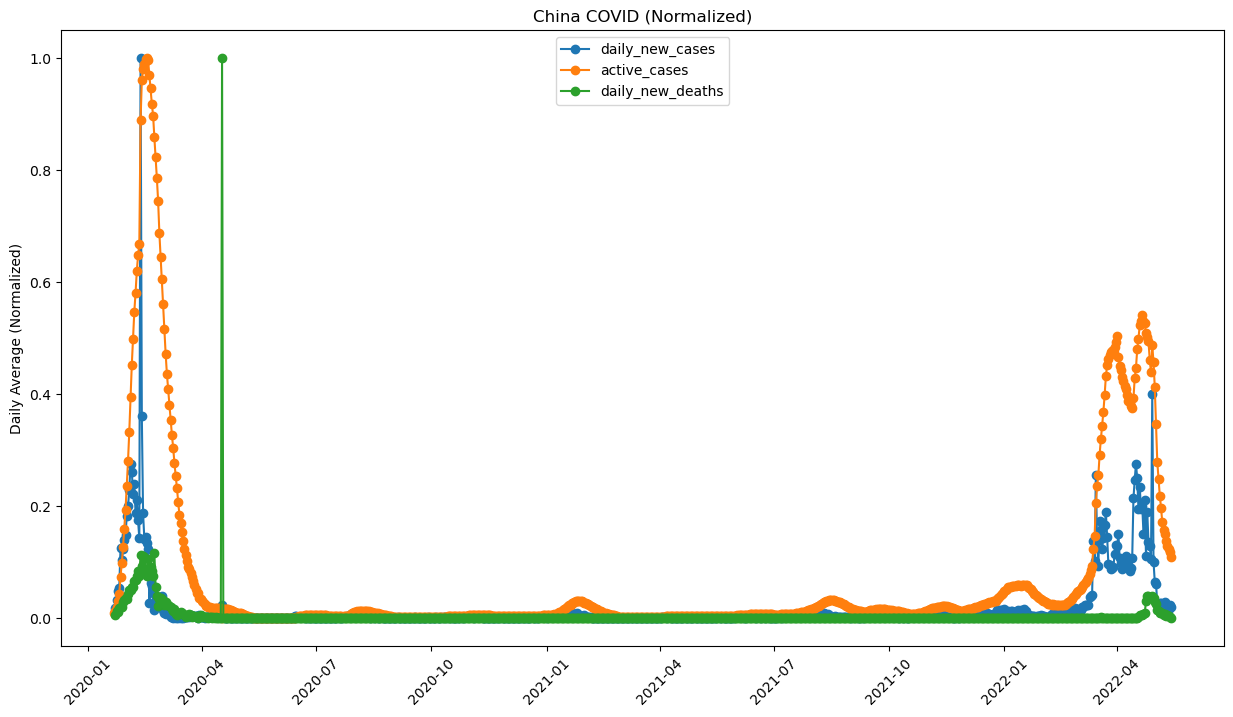

In [24]:
china_df = daily_covid_df.loc[(daily_covid_df['country'] == 'China')]
china_df = china_df[['date', 'daily_new_cases', 'active_cases', 'daily_new_deaths']].set_index('date')
china_df.head()
# Normalize the data in each column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(china_df)
china_normalized_df = pd.DataFrame(scaled_data, columns=china_df.columns, index=china_df.index)

# Plot the normalized data
plt.figure(figsize=(15, 8))
for column in china_normalized_df.columns:
    plt.plot(china_normalized_df.index, china_normalized_df[column], marker='o', linestyle='-', label=column)

plt.title('China COVID (Normalized)')
plt.ylabel('Daily Average (Normalized)')
plt.legend(loc='upper center')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Top COVID Countries

In [26]:
# Find the countries with the most cases
most_cases_df = (daily_covid_df.groupby('country')['cumulative_total_cases']
                               .max()
                               .reset_index()
                               .sort_values(by='cumulative_total_cases', ascending=False)
                )
most_cases_df.head(10)

,country,cumulative_total_cases
212,USA,84209473.0
94,India,43121599.0
26,Brazil,30682094.0
72,France,29160802.0
78,Germany,25774509.0
211,UK,22159805.0
165,Russia,18255337.0
189,South Korea,17756627.0
101,Italy,17030711.0
209,Turkey,15053168.0


In [28]:
# Create a list  and dataframe of Countries with the most cases
most_covid_countries = ['USA', 'India', 'Brazil', 'France', 'Germany', 'China']
# , 'UK', 'Russia', 'South Korea', 'Italy', 'Turkey'
most_covid_df = daily_covid_df[daily_covid_df['country'].isin(most_covid_countries)]
most_covid_df

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,year_month
21320,2020-02-15,Brazil,0.0,NaN,0.0,0.0,NaN,2020-02
21321,2020-02-16,Brazil,0.0,NaN,0.0,0.0,NaN,2020-02
21322,2020-02-17,Brazil,0.0,NaN,0.0,0.0,NaN,2020-02
21323,2020-02-18,Brazil,0.0,NaN,0.0,0.0,NaN,2020-02
21324,2020-02-19,Brazil,0.0,NaN,0.0,0.0,NaN,2020-02
...,...,...,...,...,...,...,...,...
177402,2022-05-10,USA,83895556.0,85415.0,1802388.0,1025701.0,392.0,2022-05
177403,2022-05-11,USA,83994864.0,99308.0,1853628.0,1026020.0,319.0,2022-05
177404,2022-05-12,USA,84093964.0,99100.0,1903966.0,1026309.0,289.0,2022-05
177405,2022-05-13,USA,84182733.0,88769.0,1949109.0,1026591.0,282.0,2022-05


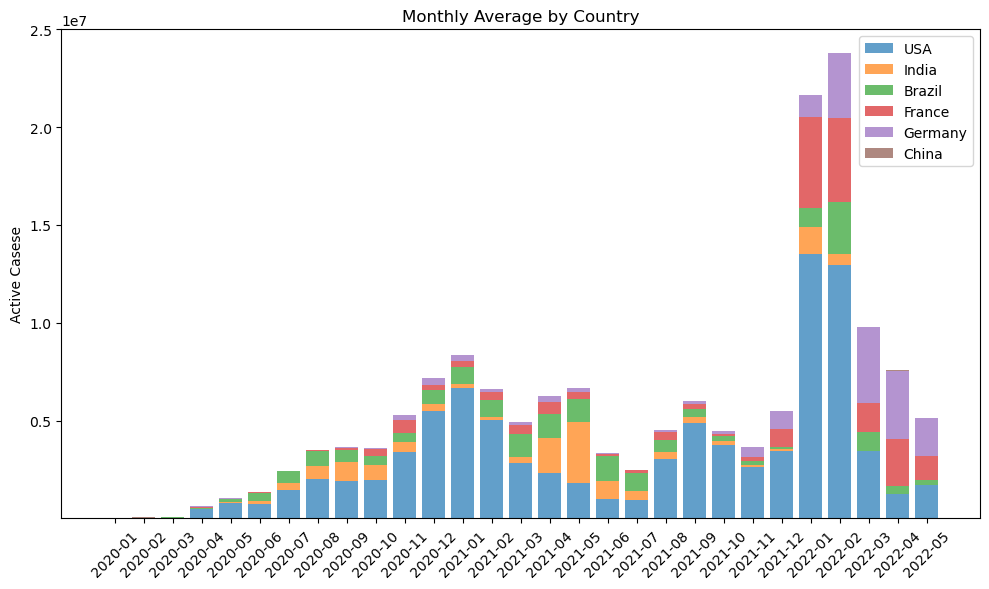

In [29]:
# Group by 'year_month' and 'country' and calculate the mean of 'active_cases' for each group
top_new_cases_df = most_covid_df.groupby(['year_month', 'country'])['daily_new_cases'].mean().unstack().fillna(0)
top_new_cases_df = top_new_cases_df[most_covid_countries]
top_active_df = most_covid_df.groupby(['year_month', 'country'])['active_cases'].mean().unstack().fillna(0)
top_active_df = top_active_df[most_covid_countries]
top_new_deaths_df = most_covid_df.groupby(['year_month', 'country'])['daily_new_deaths'].mean().unstack().fillna(0)
top_new_deaths_df = top_new_deaths_df[most_covid_countries]

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot each country as a stacked bar
bottom = None  # Initialize the bottom value

for country in top_active_df.columns:
    if bottom is None:
        plt.bar(top_active_df.index, top_active_df[country], label=country, alpha=0.7)
        bottom = top_active_df[country]
    else:
        plt.bar(top_active_df.index, top_active_df[country], bottom=bottom, label=country, alpha=0.7)
        bottom += top_active_df[country]

plt.title('Active Cases by Country')
plt.ylabel('Monthly Average')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

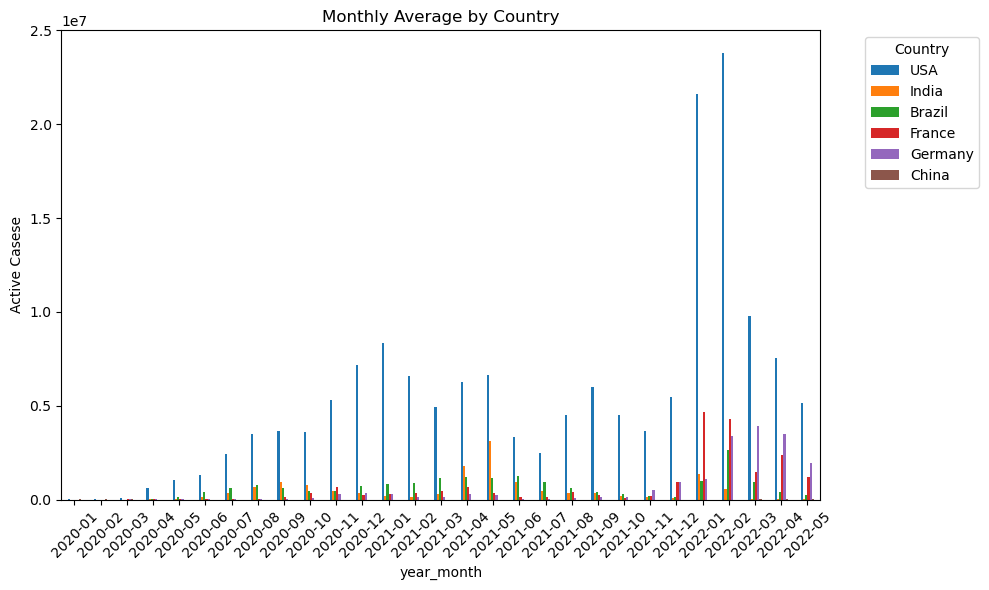

In [30]:
top_active_df.plot(kind='bar', figsize=(10, 6))

plt.title('Monthly Average by Country')
plt.ylabel('Active Casese')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

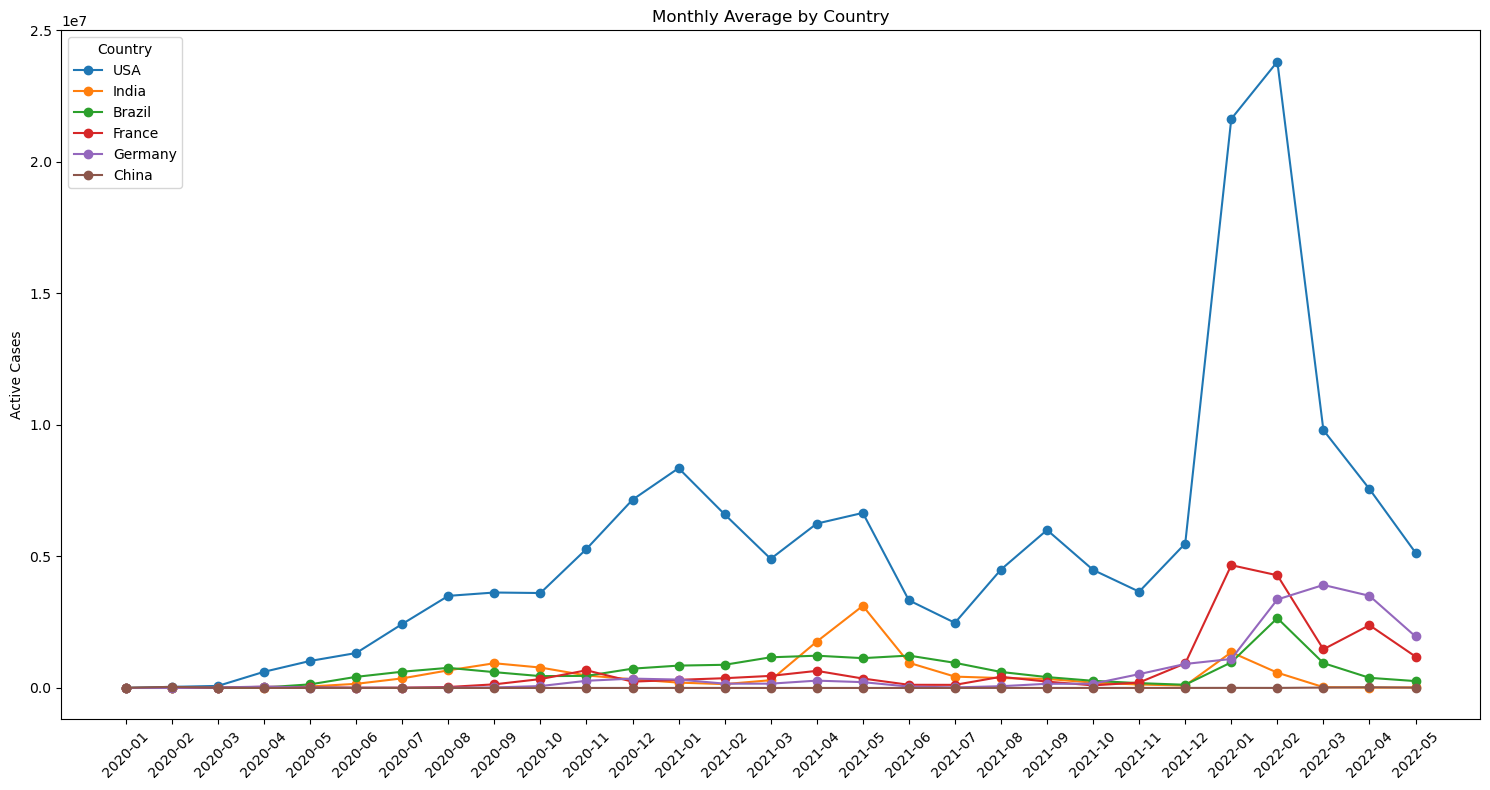

In [31]:
plt.figure(figsize=(15, 8))
for country in top_active_df.columns:
    plt.plot(top_active_df.index, top_active_df[country], label=country, marker='o')

plt.title('Monthly Average by Country')
plt.ylabel('Active Cases')
plt.legend(title='Country', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

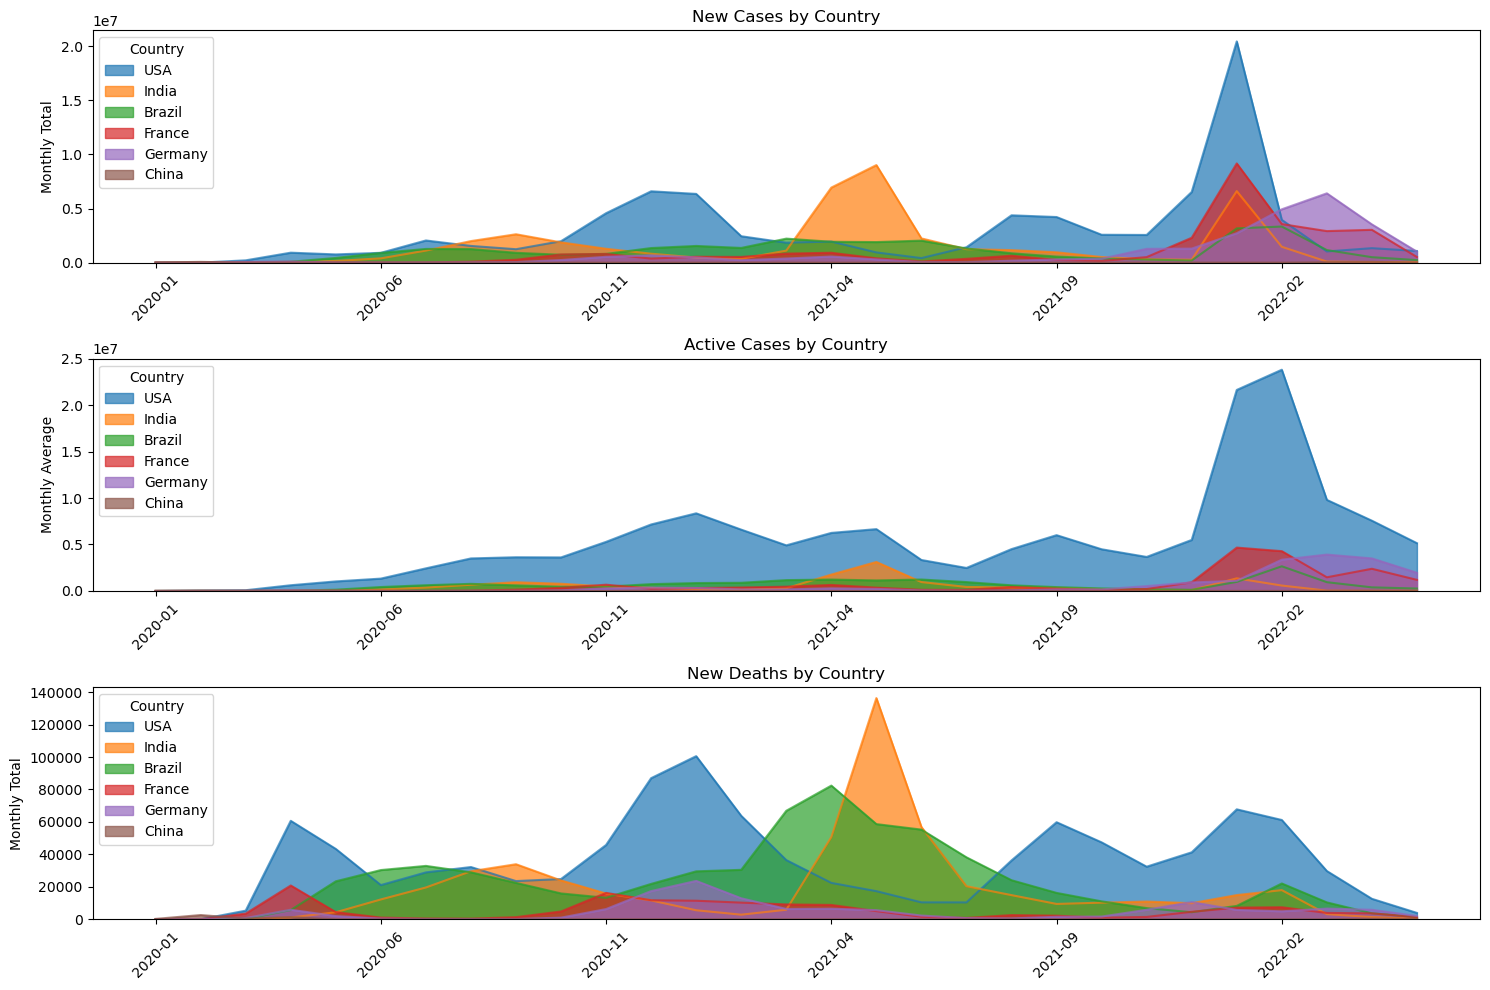

In [34]:
# Plot new cases, active cases and deaths for the countries witht he most COVID
# Create subplots for each DataFrame
fig, axes = plt.subplots(3, figsize=(15, 10))

# Plot new cases
top_new_cases_df.plot.area(stacked=False, ax=axes[0], alpha=0.7)
axes[0].set_title('New Cases by Country')
axes[0].set_ylabel('Monthly Total')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Country', loc='upper left')

# Plot active cases
top_active_df.plot.area(stacked=False, ax=axes[1], alpha=0.7)
axes[1].set_title('Active Cases by Country')
axes[1].set_ylabel('Monthly Average')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Country', loc='upper left')

# Plot new deaths
top_new_deaths_df.plot.area(stacked=False, ax=axes[2], alpha=0.7)
axes[2].set_title('New Deaths by Country')
axes[2].set_ylabel('Monthly Total')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Country', loc='upper left')

plt.tight_layout()
plt.show()